In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xesmf as xe
from scipy.stats import linregress
import cmocean

# AMO Index (Hadisst-fed)

In [29]:
df = pd.read_csv('amo_monthly_10yrLP.csv', sep='\s+', index_col=0, header=None, parse_dates=True)

In [30]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1870.0,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
1871.0,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.00,0.00
1872.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1873.0,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02
1874.0,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
2017.0,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
2018.0,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
2019.0,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [31]:
ds = xr.Dataset(data_vars=dict(sst = (['time'], df.to_numpy().flatten())), 
                coords={'time': pd.date_range('1870', '2022', freq='ME')},
                attrs={'description':'Atlantic Multidecadal Oscillation Index (10yr Low-Pass, Monthly). \n Data from https://climatedataguide.ucar.edu/climate-data/atlantic-multi-decadal-oscillation-amo'})

In [32]:
ds

<xarray.Dataset> Size: 29kB
Dimensions:  (time: 1824)
Coordinates:
  * time     (time) datetime64[ns] 15kB 1870-01-31 1870-02-28 ... 2021-12-31
Data variables:
    sst      (time) float64 15kB -0.02 -0.02 -0.01 ... -999.0 -999.0 -999.0
Attributes:
    description:  Atlantic Multidecadal Oscillation Index (10yr Low-Pass, Mon...

In [33]:
sst = ds.sst.where(ds.sst!=-999., np.nan)

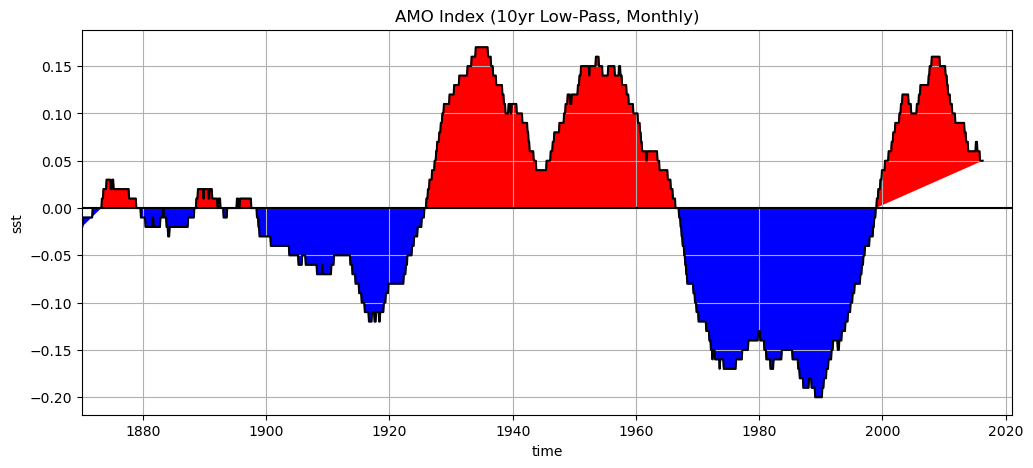

In [34]:
plt.figure(figsize=(12,5))
sst.plot(color='k')
plt.fill(sst.time, sst.where(sst>=0), color='r')
plt.fill(sst.time, sst.where(sst<=0), color='b')
plt.axhline(y=0, color='k')
plt.xlim(sst.time.sel(time='1870', method='nearest'), sst.time.sel(time='2021', method='nearest'))
plt.title('AMO Index (10yr Low-Pass, Monthly)')
plt.grid();

In [70]:
sst.to_dataset().to_netcdf('/work5/stb/MHW-gfdl/compare_avgs_trends/amo_index.nc')

# OISST-fed AMO index

In [2]:
ds = xr.open_dataset('oisst-monthly-NATL.nc', chunks={})

In [3]:
ds.load()

<xarray.Dataset> Size: 396MB
Dimensions:  (time: 529, lon: 520, lat: 360)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-09-01
  * lon      (lon) float32 2kB -99.88 -99.62 -99.38 -99.12 ... 29.38 29.62 29.88
  * lat      (lat) float32 1kB 0.125 0.375 0.625 0.875 ... 89.38 89.62 89.88
Data variables:
    sst      (time, lat, lon) float32 396MB 21.22 21.17 21.13 ... -1.8 -1.355
Attributes:
    CDI:            Climate Data Interface version 1.9.10 (https://mpimet.mpg...
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    institution:    NOAA/National Centers for Environmental Information
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 1.9.10 (https://mpimet.mpg...
    history:        06-Oct-2025 13:48:40 Subset NOAA/PSL

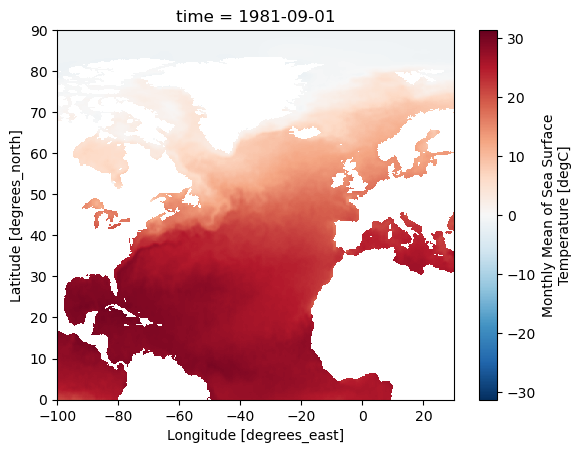

In [4]:
ds.sst[0].plot()

In [5]:
m = xr.open_dataset('RECCAP2_region_masks_all_v20221025.nc', chunks={})

In [6]:
m

<xarray.Dataset> Size: 523kB
Dimensions:     (lat: 180, lon: 360)
Coordinates:
  * lon         (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Data variables:
    seamask     (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    coast       (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    open_ocean  (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    atlantic    (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    pacific     (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    indian      (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    arctic      (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    southern    (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
Attributes:
    date:         2022-06-20
    contact:      gregorl@ethz.ch
    description:  regional masks created for the RECCAP2 ocean chapters. The ...
    helper_code:  The following snippet of code can be used to list the regio...

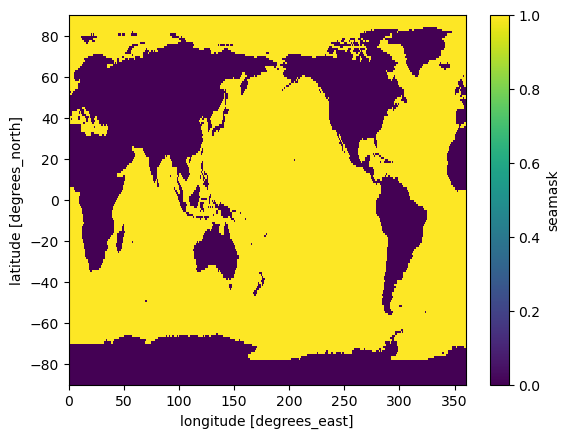

In [7]:
m.seamask.plot()

In [8]:
m_new1 = m.roll(lon=180)
m_new = m_new1.assign_coords(lon=np.arange(-179,181))

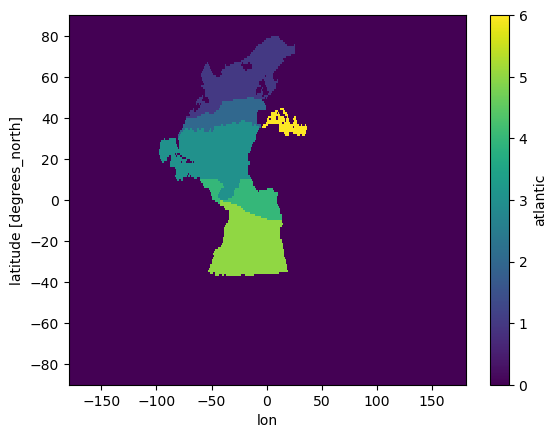

In [9]:
m_new.atlantic.plot()

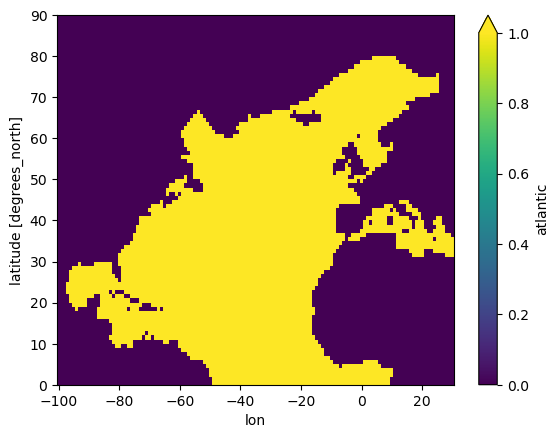

In [10]:
m_new.atlantic.sel(lat=slice(0,90), lon=slice(-100,30)).plot(vmin=0, vmax=1)

In [11]:
mask = m_new.atlantic.sel(lat=slice(0,90), lon=slice(-100,30))
mask_bool = mask.where(mask==0, 1)

In [12]:
regridder = xe.Regridder(ds.sst[0], mask_bool, method='bilinear')

sst_ng = regridder(ds.sst)
sst_ng

<xarray.DataArray (time: 529, lat: 90, lon: 131)> Size: 25MB
array([[[ 0.       , 21.549915 , 21.734663 , ...,        nan,
                nan,  0.       ],
        [ 0.       , 23.492575 , 23.592327 , ...,        nan,
                nan,  0.       ],
        [ 0.       , 24.887077 , 25.274666 , ...,        nan,
                nan,  0.       ],
        ...,
        [ 0.       , -1.3195833, -1.3248334, ..., -1.3156667,
         -1.318    ,  0.       ],
        [ 0.       , -1.3141667, -1.3161666, ..., -1.3126667,
         -1.3140833,  0.       ],
        [ 0.       , -1.3121667, -1.31225  , ..., -1.3118333,
         -1.3118333,  0.       ]],

       [[ 0.       , 23.452175 , 23.23032  , ...,        nan,
                nan,  0.       ],
        [ 0.       , 24.806204 , 24.66943  , ...,        nan,
                nan,  0.       ],
        [ 0.       , 25.640804 , 25.751612 , ...,        nan,
                nan,  0.       ],
...
        [ 0.       , -1.5339519, -1.537823 , ..., -1.5920159,
         -1.5883062,  0.       ],
        [ 0.       , -1.6370964, -1.6048385, ..., -1.6162095,
         -1.6157256,  0.       ],
        [ 0.       , -1.6670159, -1.6588709, ..., -1.6956453,
         -1.7145966,  0.       ]],

       [[ 0.       , 22.266497 , 22.118412 , ...,        nan,
                nan,  0.       ],
        [ 0.       , 24.344576 , 24.650244 , ...,        nan,
                nan,  0.       ],
        [ 0.       , 26.059074 , 26.051577 , ...,        nan,
                nan,  0.       ],
        ...,
        [ 0.       , -1.5716666, -1.5816667, ..., -1.641    ,
         -1.6369165,  0.       ],
        [ 0.       , -1.6605831, -1.6474998, ..., -1.5840834,
         -1.5910001,  0.       ],
        [ 0.       , -1.6686665, -1.6730833, ..., -1.6876668,
         -1.7074999,  0.       ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-09-01
  * lat      (lat) float64 720B 0.5 1.5 2.5 3.5 4.5 ... 85.5 86.5 87.5 88.5 89.5
  * lon      (lon) int64 1kB -100 -99 -98 -97 -96 -95 -94 ... 25 26 27 28 29 30
Attributes:
    regrid_method:  bilinear

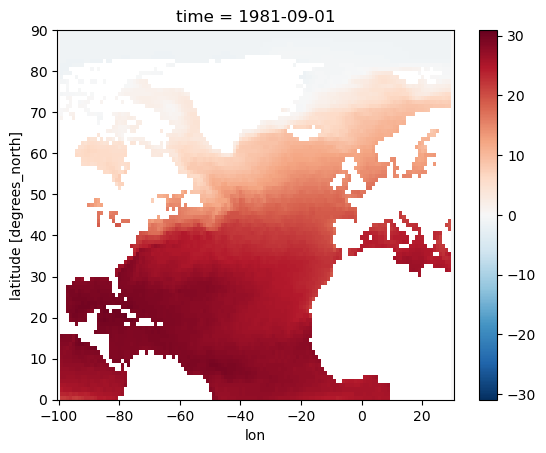

In [13]:
sst_ng[0].plot()

In [14]:
sst = sst_ng.where(mask_bool)

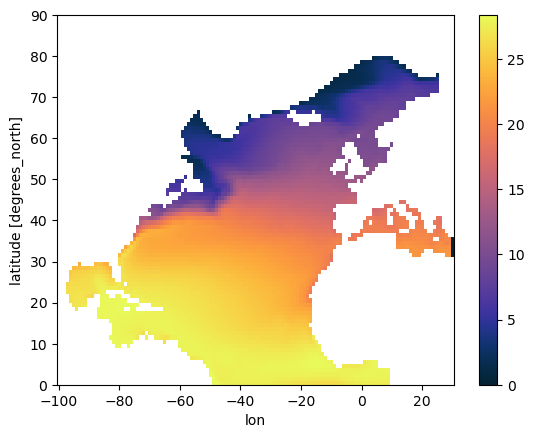

In [15]:
sst.mean('time').plot(cmap=cmocean.cm.thermal)

In [16]:
sst_anom = sst.groupby('time.month') - sst.groupby('time.month').mean('time')

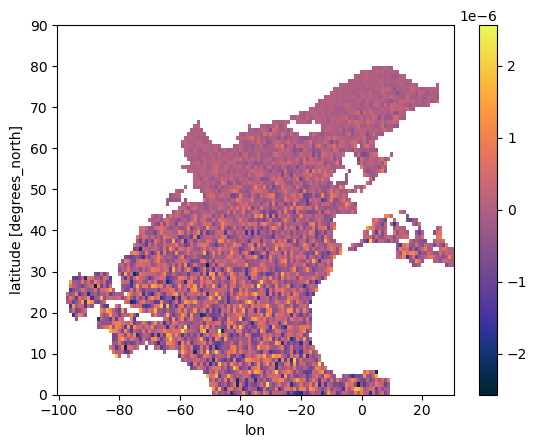

In [17]:
sst_anom.mean('time').plot(cmap=cmocean.cm.thermal)

In [18]:
trend = {}
trend['sst_trend_lr'] = linregress(np.arange(0, sst_anom.time.size), sst_anom.mean(['lat','lon']))
trend['sst_trend_line_lr'] = trend['sst_trend_lr'][0]*np.arange(0, sst_anom.time.size) + trend['sst_trend_lr'][1]

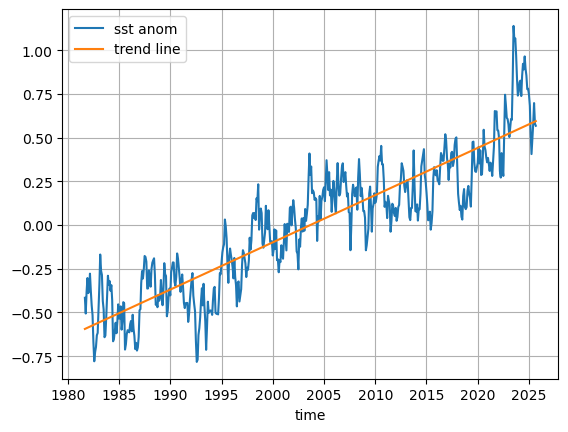

In [19]:
sst_anom.mean(['lat','lon']).plot(label='sst anom')
plt.plot(sst_anom.time, trend['sst_trend_line_lr'], label='trend line')
plt.legend()
plt.grid();

In [20]:
detrend = sst_anom.mean(['lat','lon']) - trend['sst_trend_line_lr']

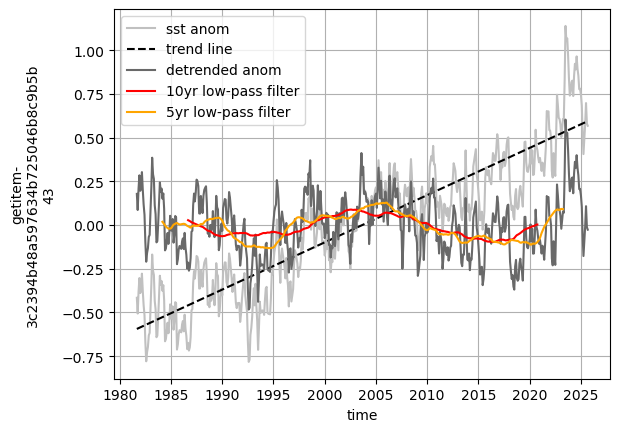

In [28]:
sst_anom.mean(['lat','lon']).plot(label='sst anom', color='silver')
plt.plot(sst_anom.time, trend['sst_trend_line_lr'], label='trend line', color='k', linestyle='dashed')
detrend.plot(label='detrended anom', color='dimgrey')
detrend.rolling(time=120, center=True).mean('time').plot(label='10yr low-pass filter', color='r')
detrend.rolling(time=60, center=True).mean('time').plot(label='5yr low-pass filter', color='orange')
plt.legend()
plt.grid();

In [35]:
amo_had = xr.open_dataset('/work5/stb/MHW-gfdl/compare_avgs_trends/amo_index.nc')

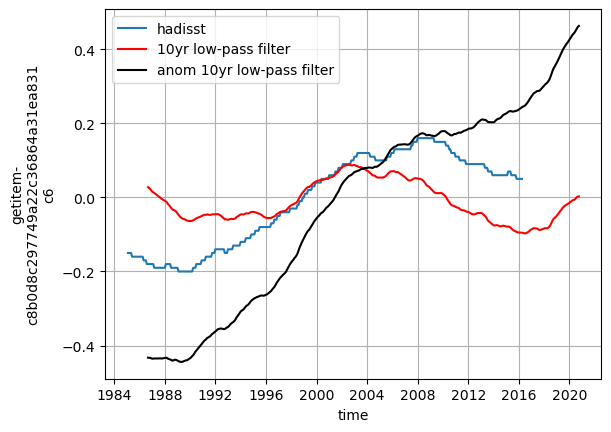

In [47]:
amo_had.sst.sel(time=slice('1985', '2020')).plot(label='hadisst')
detrend.rolling(time=120, center=True).mean('time').plot(label='10yr low-pass filter', color='r')
sst_anom.mean(['lat','lon']).rolling(time=120, center=True).mean('time').plot(label='anom 10yr low-pass filter', color='k')
#detrend.rolling(time=60, center=True).mean('time').plot(label='5yr low-pass filter', color='orange')
plt.legend()
plt.grid();

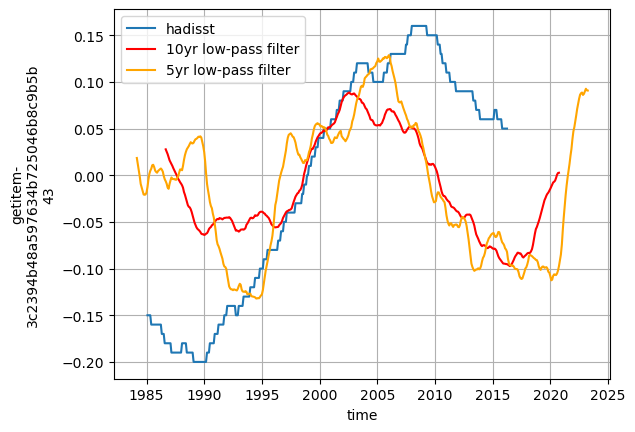

In [49]:
amo_had.sst.sel(time=slice('1985', '2020')).plot(label='hadisst')
detrend.rolling(time=120, center=True).mean('time').plot(label='10yr low-pass filter', color='r')
detrend.rolling(time=60, center=True).mean('time').plot(label='5yr low-pass filter', color='orange')
plt.legend()
plt.grid();

In [45]:
detrend.to_dataset(name='oisst').to_netcdf('/work5/stb/MHW-gfdl/compare_avgs_trends/detrended-oisst-anom.nc')

<xarray.Dataset> Size: 13kB
Dimensions:  (time: 529)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-09-01
    month    (time) int64 4kB 9 10 11 12 1 2 3 4 5 6 7 ... 12 1 2 3 4 5 6 7 8 9
Data variables:
    oisst    (time) float64 4kB dask.array<chunksize=(12,), meta=np.ndarray>